In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from sklearn.metrics import mean_absolute_error

%matplotlib inline

In [2]:
databyMonth=pd.read_excel("DatabyMonth-135-8years.xlsx")
databyMonth.head()

,Truck
0,39
1,41
2,57
3,61
4,54


In [3]:
index=pd.date_range(start='1/1/2011', end='12/31/2018', freq='M', name='Date') #Create 'M'onthly period index for in the 
                                                                               #specified range

In [4]:
index

DatetimeIndex(['2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
               '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31',
               '2011-09-30', '2011-10-31', '2011-11-30', '2011-12-31',
               '2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
      

In [5]:
databyMonth['Truck'].values

array([39, 41, 57, 61, 54, 71, 56, 39, 40, 48, 44, 40, 33, 40, 44, 35, 35,
       31, 51, 39, 49, 33, 41, 43, 45, 35, 41, 30, 40, 44, 26, 20, 31, 26,
       37, 22, 40, 28, 44, 38, 41, 27, 25, 17, 22, 24, 29, 19, 30, 18, 26,
       21, 23, 20, 22, 16, 18, 22, 20, 18, 22, 23, 22, 23, 19, 25, 19,  8,
       19, 25, 15, 18, 26, 26, 29, 31, 28, 23, 21, 17, 20, 18, 27, 26, 30,
       22, 29, 27, 24, 31, 30, 10, 27, 19, 25, 19], dtype=int64)

In [6]:
databyMonth=pd.Series(databyMonth['Truck'].values,index=index)
databyMonth.head()

Date
2011-01-31    39
2011-02-28    41
2011-03-31    57
2011-04-30    61
2011-05-31    54
Freq: M, dtype: int64

In [53]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

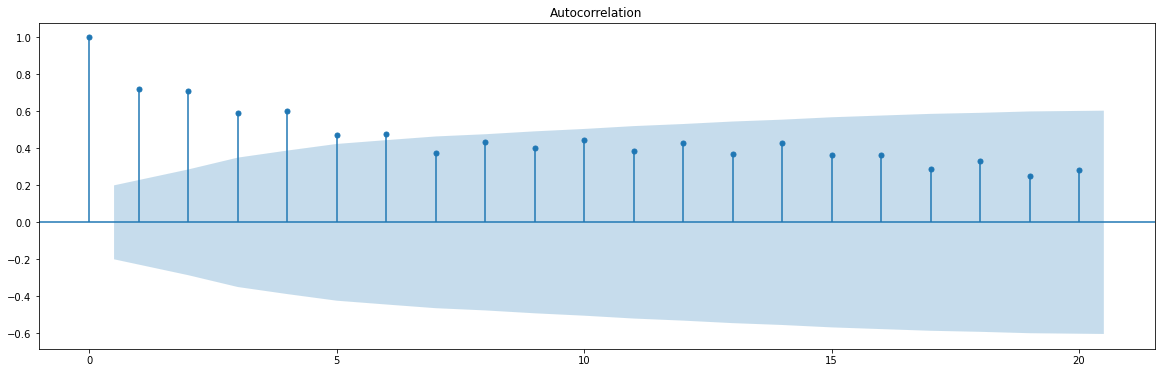

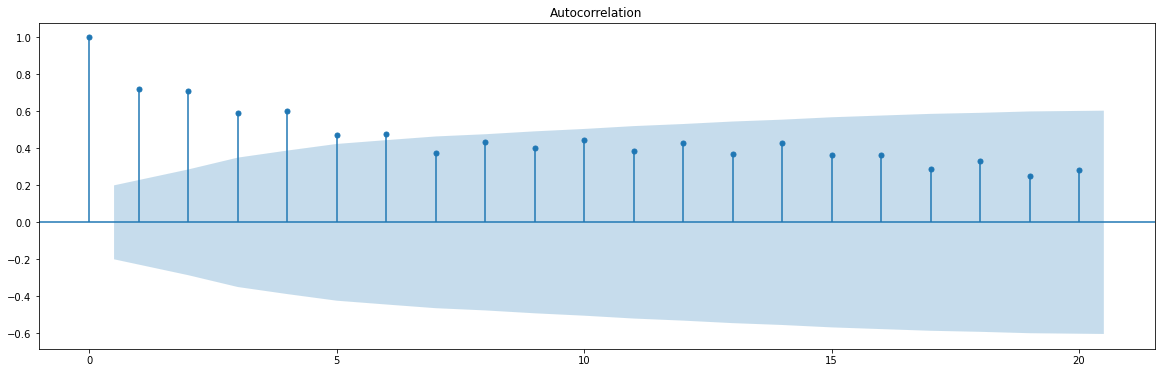

In [52]:
plot_acf(databyMonth)

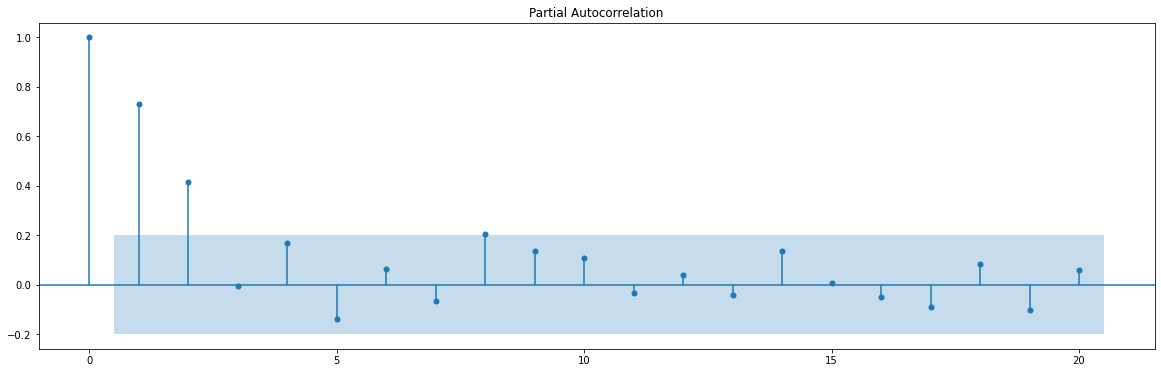

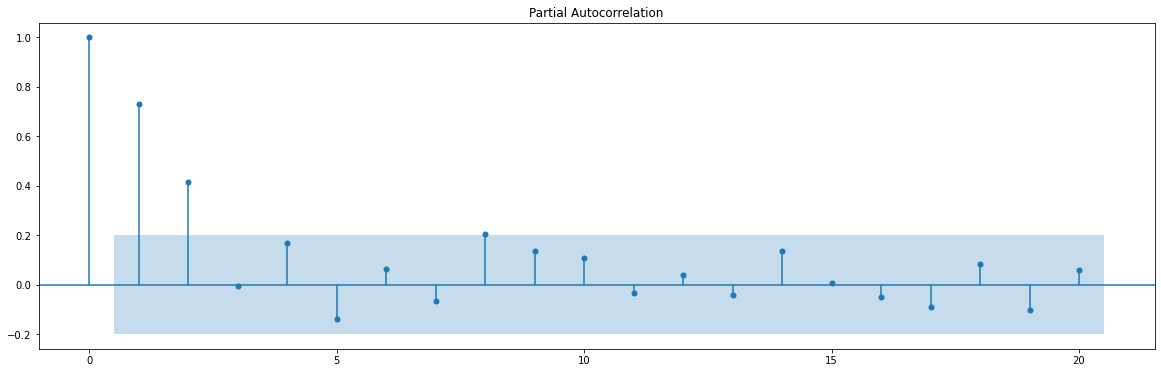

In [54]:
plot_pacf(databyMonth)

In [7]:
list1=[1,2,3,4,5,6,7,8,9,10,11,12]

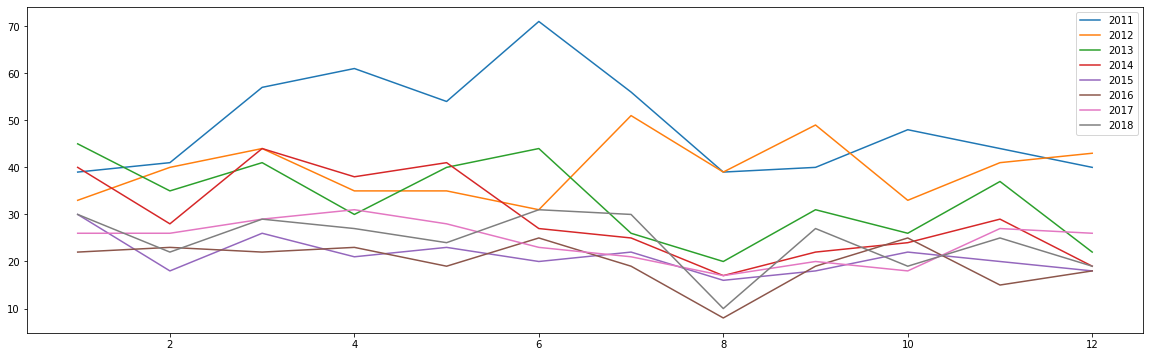

In [8]:
plt.rcParams['figure.figsize']=(20,6)
yıl1=pd.Series(databyMonth.values[0:12],index=list1)
yıl2=pd.Series(databyMonth.values[12:24],index=list1)
yıl3=pd.Series(databyMonth.values[24:36],index=list1)
yıl4=pd.Series(databyMonth.values[36:48],index=list1)
yıl5=pd.Series(databyMonth.values[48:60],index=list1)
yıl6=pd.Series(databyMonth.values[60:72],index=list1)
yıl7=pd.Series(databyMonth.values[72:84],index=list1)
yıl8=pd.Series(databyMonth.values[84:96],index=list1) # 2018-December is missing
yıl1.plot(label='2011')
yıl2.plot(label='2012')
yıl3.plot(label='2013')
yıl4.plot(label='2014')
yıl5.plot(label='2015')
yıl6.plot(label='2016')
yıl7.plot(label='2017')
yıl8.plot(label='2018')
plt.legend()

In [9]:
databyMonthx=pd.DataFrame(databyMonth,columns=['Truck'])  # Series must be a DataFrame to use 'groupby' method
databyMonthx['Date']=databyMonth.index             
databyMonthx.head()

,Truck,Date
Date,,
2011-01-31,39,2011-01-31
2011-02-28,41,2011-02-28
2011-03-31,57,2011-03-31
2011-04-30,61,2011-04-30
2011-05-31,54,2011-05-31


In [10]:
databyYear=pd.DataFrame(databyMonthx.groupby([databyMonthx['Date'].dt.year])['Truck'].sum(),columns=['Truck'])
databyYear

,Truck
Date,
2011,590
2012,474
2013,397
2014,354
2015,254
2016,238
2017,292
2018,293


In [11]:
index2=pd.date_range(start='2011',end='2019',freq='Y',name='Date')
index2

DatetimeIndex(['2011-12-31', '2012-12-31', '2013-12-31', '2014-12-31',
               '2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', freq='A-DEC')

In [12]:
databyYear=pd.DataFrame(databyYear['Truck'].values,index=index2,columns=['Truck'])

In [13]:
databyYear

,Truck
Date,
2011-12-31,590
2012-12-31,474
2013-12-31,397
2014-12-31,354
2015-12-31,254
2016-12-31,238
2017-12-31,292
2018-12-31,293


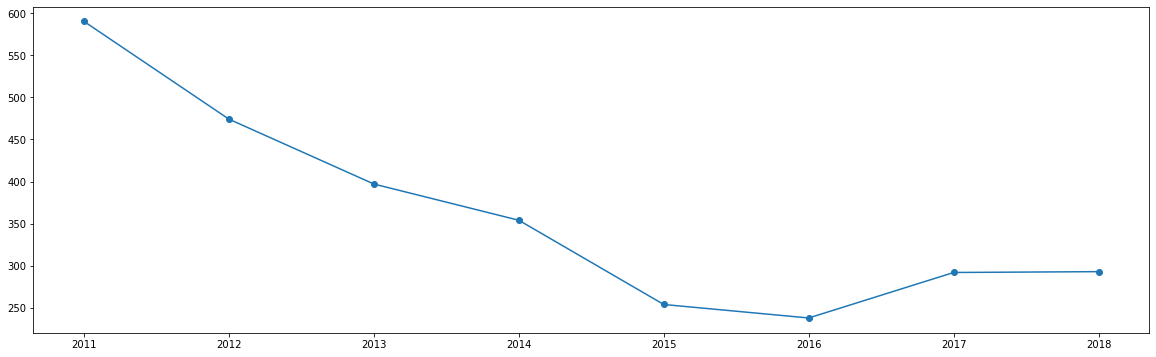

In [14]:
 plt.plot(np.arange(2011,2019),databyYear['Truck'].values,marker='o') #plt.plot(databyYear) 

In [15]:
databyMonth.drop(columns='Date2',inplace=True)

# Moving Average Method

In [16]:
double=databyMonth.rolling(window=2).mean().values
double=double.tolist()
double=double[1:]
mean_absolute_error(double,databyMonth.iloc[1:].values)

3.463157894736842

In [17]:
triple=databyMonth.rolling(window=3).mean().values

In [18]:
triple=triple.tolist()
triple=triple[2:]
mean_absolute_error(triple,databyMonth.iloc[2:].values)

3.8581560283687946

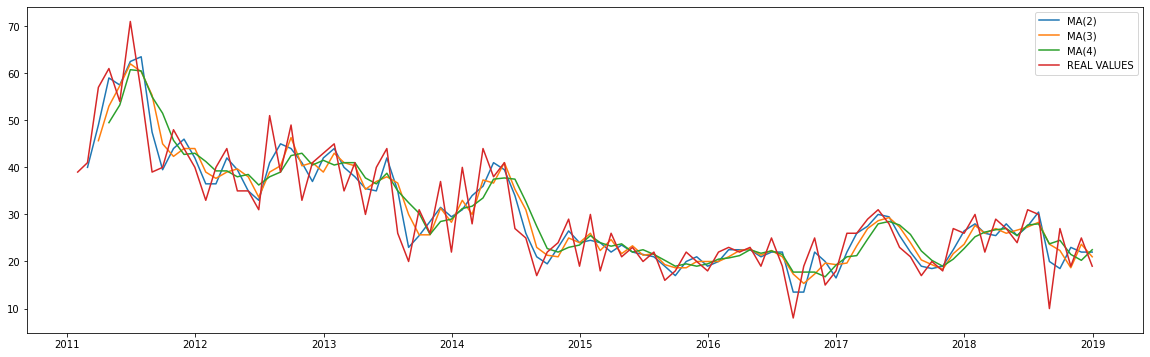

In [19]:
plt.plot(databyMonth.rolling(window=2).mean(),label="MA(2)")
plt.plot(databyMonth.rolling(window=3).mean(),label="MA(3)")
plt.plot(databyMonth.rolling(window=4).mean(),label="MA(4)")
plt.plot(databyMonth,label="REAL VALUES")
plt.legend()

# Exponential Smothing Models
# Simple Exponential Smothing

In [20]:
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing, Holt

C:\Users\mert_\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [21]:
SES=SimpleExpSmoothing(databyMonth)

In [22]:
fit1=SES.fit(smoothing_level=0.2,optimized=False)
fit2=SES.fit(smoothing_level=0.6,optimized=False)
fit3=SES.fit() #optimum value

In [23]:
params_comp=pd.concat([fit1.params_formatted,fit2.params_formatted,fit3.params_formatted],axis=0)

In [24]:
params_comp.rename_axis('Level',inplace=True)

In [25]:
params_comp

,name,param,optimized
Level,,,
smoothing_level,alpha,0.200000,False
initial_level,l.0,39.000000,False
smoothing_level,alpha,0.600000,False
initial_level,l.0,39.000000,False
smoothing_level,alpha,0.325360,True
initial_level,l.0,47.410991,True


In [26]:
fcast1=fit1.forecast(3)
fcast2=fit2.forecast(3)
fcast3=fit3.forecast(3)

In [27]:
fcast_comp=pd.concat([fcast1,fcast2,fcast3],axis=1) #For Series:fcast1.append(to_append=[fcast2,fcast3],ignore_index=False)
fcast_comp.columns=["fcast1","fcast2","fcast3"]
fcast_comp

,fcast1,fcast2,fcast3
2019-01-31,22.676147,20.716236,21.794216
2019-02-28,22.676147,20.716236,21.794216
2019-03-31,22.676147,20.716236,21.794216


In [28]:
model_comp1=[fit1.aic,fit1.aicc,fit1.bic]
model_comp2=[fit2.aic,fit2.aicc,fit2.bic]
model_comp3=[fit3.aic,fit3.aicc,fit3.bic]
model_comp1

[390.89341647828434, 391.3329769178448, 396.02211286122]

In [29]:
model_comps=pd.DataFrame(columns=["Model-1","Model-2","Model-3"],index=["AIC", "AICc","BIC"])
model_comps["Model-1"]=model_comp1
model_comps["Model-2"]=model_comp2
model_comps["Model-3"]=model_comp3
model_comps

,Model-1,Model-2,Model-3
AIC,390.893416,389.940848,384.246889
AICc,391.332977,390.380409,384.686450
BIC,396.022113,395.069545,389.375586


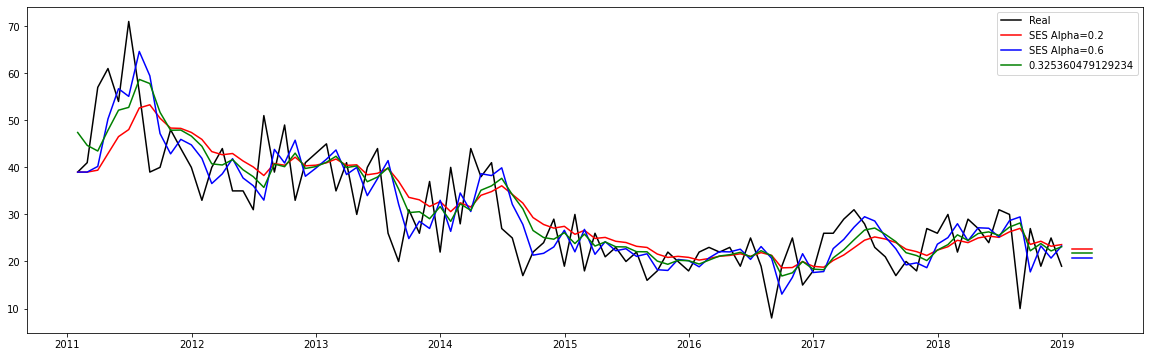

In [30]:
plt.plot(databyMonth,color='k',label='Real')
plt.plot(fit1.fittedvalues, color='r',label='SES Alpha=0.2' )
plt.plot(fcast1,color='r' )
plt.plot(fit2.fittedvalues,color='b',label='SES Alpha=0.6')
plt.plot(fcast2,color='b')
plt.plot(fit3.fittedvalues,color='g',label=fit3.params['smoothing_level'])
plt.plot(fcast3,color='g')
plt.legend()

# Holt Winter's Method

In [31]:
fit1=Holt(databyMonth).fit(smoothing_level=0.8,smoothing_slope=0.2,optimized=False)
fit2=Holt(databyMonth,exponential=True).fit() #to run this,remove non-zero values
fit3=Holt(databyMonth,damped=True).fit(smoothing_level=0.8,smoothing_slope=0.2)

C:\Users\mert_\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:939: RuntimeWarning: invalid value encountered in double_scalars
  'initial_slope': b[0] / phi,


In [32]:
model_comp1=[fit1.aic,fit1.aicc,fit1.bic]
model_comp2=[fit2.aic,fit2.aicc,fit2.bic]
model_comp3=[fit3.aic,fit3.aicc,fit3.bic]
model_comp1
model_comps=pd.DataFrame(columns=["Model-1","Model-2","Model-3"],index=["AIC", "AICc","BIC"])
model_comps["Model-1"]=model_comp1
model_comps["Model-2"]=model_comp2
model_comps["Model-3"]=model_comp3
model_comps

,Model-1,Model-2,Model-3
AIC,418.399917,384.453508,405.927331
AICc,419.343738,385.397328,407.200059
BIC,428.657310,394.710900,418.749072


In [33]:
fcast1=fit1.forecast(3)
fcast2=fit2.forecast(3)
fcast3=fit3.forecast(3)

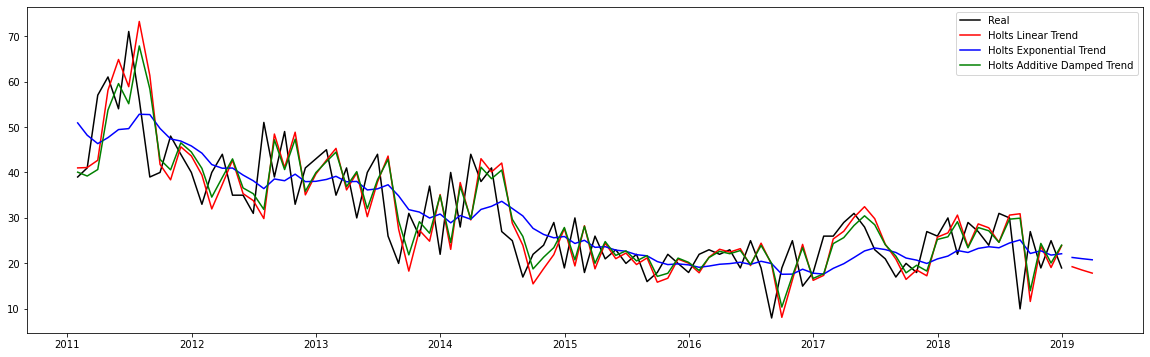

In [34]:
plt.plot(databyMonth,color='k',label='Real')
plt.plot(fit1.fittedvalues, color='r',label='Holts Linear Trend' )
plt.plot(fcast1,color='r' )
plt.plot(fit2.fittedvalues,color='b',label='Holts Exponential Trend')
plt.plot(fcast2,color='b')
plt.plot(fit3.fittedvalues,color='g',label='Holts Additive Damped Trend')
plt.plot(fcast3,color='g')
plt.legend()

In [35]:
fit1=ExponentialSmoothing(databyMonth, seasonal_periods=12, trend='add',seasonal='add').fit()
fit2=ExponentialSmoothing(databyMonth, seasonal_periods=12, trend='add',seasonal='mul').fit()
fit3=ExponentialSmoothing(databyMonth, seasonal_periods=12, trend='add',seasonal='add',damped=True).fit()
fit4=ExponentialSmoothing(databyMonth, seasonal_periods=12, trend='add',seasonal='mul',damped=True,).fit()

In [36]:
fit1.params

{'smoothing_level': 0.4053757176135561,
 'smoothing_slope': 3.789185663797837e-28,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 28.910232027113747,
 'initial_slope': 0.0,
 'initial_seasons': array([17.4737699 , 13.69462732, 21.28834622, 18.2615257 , 18.23319563,
        19.45561723, 16.92417268,  6.64705492, 14.37081156, 13.21872178,
        16.31058631, 12.40678693]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [37]:
results=pd.DataFrame(columns=["Model-1","Model-2","Model-3","Model-4"],index=[r"$\alpha$", r"$\beta$", r"$\phi$",r"$\gamma$", "$l_0$", "$b_0$","SSE","AIC","BIC"])
params=['smoothing_level','smoothing_slope','smoothing_seasonal','damping_slope','initial_slope', 'initial_slope']
results['Model-1']=[fit1.params[p] for p in params]+[fit1.sse]+[fit1.aic]+[fit1.bic]
results['Model-2']=[fit2.params[p] for p in params]+[fit2.sse]+[fit2.aic]+[fit2.bic]
results['Model-3']=[fit3.params[p] for p in params]+[fit3.sse]+[fit3.aic]+[fit3.bic]
results['Model-4']=[fit4.params[p] for p in params]+[fit4.sse]+[fit4.aic]+[fit4.bic]
results

,Model-1,Model-2,Model-3,Model-4
$\alpha$,4.053757e-01,4.038276e-01,4.052549e-01,0.325584
$\beta$,3.789186e-28,1.556780e-10,4.531937e-19,0.325584
$\phi$,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
$\gamma$,NaN,NaN,9.984121e-01,0.478889
$l_0$,0.000000e+00,0.000000e+00,0.000000e+00,109.052154
$b_0$,0.000000e+00,0.000000e+00,0.000000e+00,109.052154
SSE,3.425963e+03,3.460768e+03,3.425971e+03,3193.023070
AIC,3.751798e+02,3.761502e+02,3.771800e+02,370.420022
BIC,4.162094e+02,4.171797e+02,4.207740e+02,414.013941


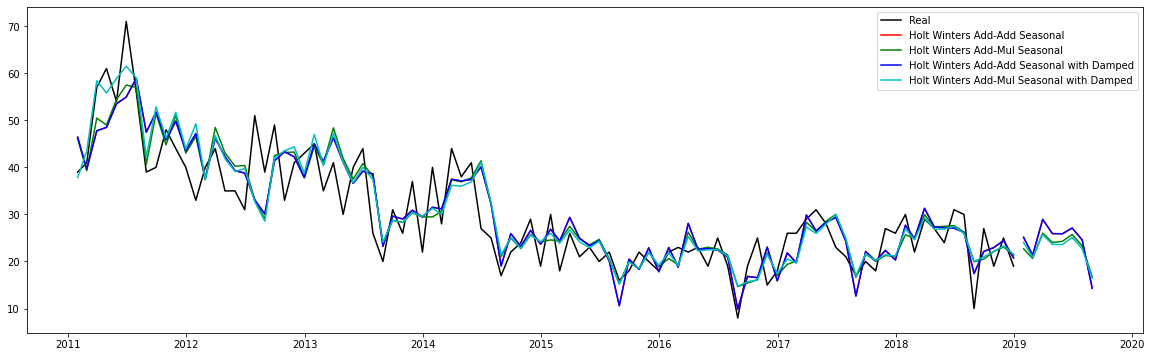

In [38]:
plt.plot(databyMonth,color='k',label='Real')
plt.plot(fit1.fittedvalues, color='r',label='Holt Winters Add-Add Seasonal' )
plt.plot(fit1.forecast(8),color='r' )
plt.plot(fit2.fittedvalues, color='g',label='Holt Winters Add-Mul Seasonal' )
plt.plot(fit2.forecast(8),color='g' )
plt.plot(fit3.fittedvalues, color='b',label='Holt Winters Add-Add Seasonal with Damped' )
plt.plot(fit3.forecast(8),color='b' )
plt.plot(fit4.fittedvalues, color='c',label='Holt Winters Add-Mul Seasonal with Damped' )
plt.plot(fit4.forecast(8),color='c' )
plt.legend()

In [39]:
asd=pd.concat([fit1.forecast(8),fit2.forecast(8),fit3.forecast(8),fit4.forecast(8)],axis=1)
asd.columns=["fit1","fit2","fit3","fit4"]
asd

,fit1,fit2,fit3,fit4
2019-01-31,25.118020,22.690359,25.133828,24.032566
2019-02-28,21.338877,20.638870,21.345407,20.887726
2019-03-31,28.932596,26.043406,28.953968,25.700618
2019-04-30,25.905776,24.032042,25.932618,23.624362
2019-05-31,25.877445,24.291136,25.898992,23.604901
2019-06-30,27.099867,25.738457,27.117745,25.117934
2019-07-31,24.568422,23.300584,24.583159,22.697557
2019-08-31,14.291305,16.746509,14.301444,16.488596


In [40]:
from statsmodels.tsa.stattools import adfuller

In [41]:
databyMonth=pd.DataFrame(databyMonth)

In [42]:
databyMonth.columns=['Truck']

In [43]:
databyMonth.head()

,Truck
Date,
2011-01-31,39
2011-02-28,41
2011-03-31,57
2011-04-30,61
2011-05-31,54


In [44]:
adfuller(databyMonth['Truck'])  #Null hypothesis:Data is not stationary
                                #Alternative hypothesis:Data is stationary

(-2.40519341845232,
 0.14027596683250715,
 3,
 92,
 {'1%': -3.503514579651927,
  '5%': -2.893507960466837,
  '10%': -2.583823615311909},
 548.7717176449574)

- fail to reject Null Hypothesis since p-value(0.1436499518306299)is greater than 0.05,data is not stationary
- ADF Test is suggesting lag "3" for data to be stationary

<AxesSubplot:xlabel='Date'>

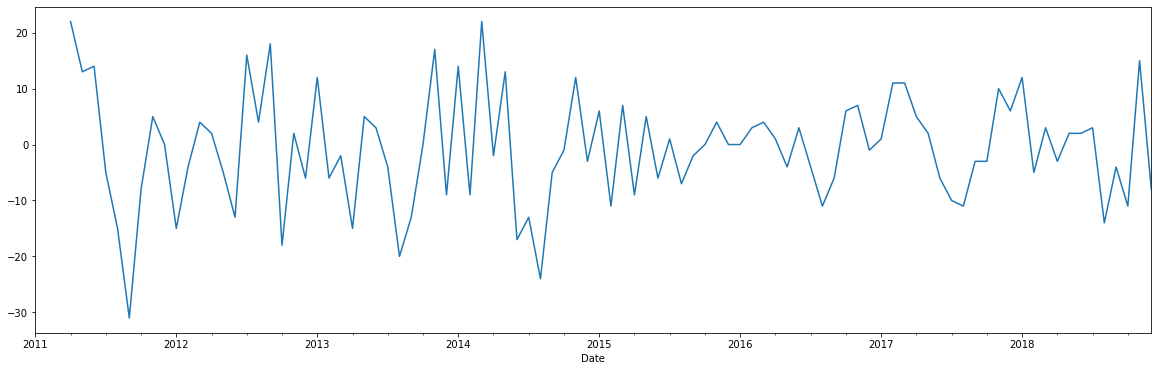

In [45]:
databyMonth['Truck'].diff(3).plot()

# ARİMA, SARİMA Model

In [46]:
from pmdarima.arima import auto_arima

In [47]:
stepwise_model=auto_arima(databyMonth['Truck'],start_p=1, start_q=1, max_p=5, max_q=5, m=12, d=1, D=1,start_P=0,trace=True,
                          stepwise=True, suppress_warnings=True, seasonal=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.54 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=627.620, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=594.325, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.35 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=617.119, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=584.660, Time=0.34 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.34 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.49 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=609.962, Time=0.16 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=586.078, Time=0.29 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=582.801, Time=0.47 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=589.734, Time=0.16 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=inf, Time=1.63 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=0.57 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=580.989, Time=

In [48]:
print(stepwise_model.aic())

580.9894986663504


In [49]:
print(stepwise_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                   96
Model:             SARIMAX(0, 1, 1)x(2, 1, 0, 12)   Log Likelihood                -286.495
Date:                            Wed, 25 Nov 2020   AIC                            580.989
Time:                                    18:44:19   BIC                            590.665
Sample:                                         0   HQIC                           584.877
                                             - 96                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7330      0.082     -8.901      0.000      -0.894      -0.572
ar.S.L12      -0.6753      0.109   